<a href="https://colab.research.google.com/github/HenryMeSa/IA/blob/main/Copia_de_deteccion_de_nomalias_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd 

In [6]:
redes = pd.read_csv('https://raw.githubusercontent.com/HenryMeSa/IA/main/log2.csv')
# summarize shape
print(redes.shape)
# show first few rows
print(redes.head())

(65532, 12)
   Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
0        57222                53            54587                    53   
1        56258              3389            56258                  3389   
2         6881             50321            43265                 50321   
3        50553              3389            50553                  3389   
4        50002               443            45848                   443   

  Action  Bytes  Bytes Sent  Bytes Received  Packets  Elapsed Time (sec)  \
0  allow    177          94              83        2                  30   
1  allow   4768        1600            3168       19                  17   
2  allow    238         118             120        2                1199   
3  allow   3327        1438            1889       15                  17   
4  allow  25358        6778           18580       31                  16   

   pkts_sent  pkts_received  
0          1              1  
1         10        

In [7]:
redes.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


In [7]:
pip install pycaret

     |████████████████████████████████| 266kB 10.0MB/s 
     |████████████████████████████████| 1.7MB 17.0MB/s 
     |████████████████████████████████| 215kB 44.5MB/s 
     |████████████████████████████████| 61kB 7.8MB/s 
     |████████████████████████████████| 6.8MB 33.2MB/s 
     |████████████████████████████████| 14.2MB 318kB/s 
     |████████████████████████████████| 276kB 51.7MB/s 
     |████████████████████████████████| 102kB 11.9MB/s 
     |████████████████████████████████| 245kB 46.7MB/s 
     |████████████████████████████████| 1.8MB 48.9MB/s 
     |████████████████████████████████| 81kB 10.5MB/s 
     |████████████████████████████████| 153kB 43.4MB/s 
     |████████████████████████████████| 61kB 7.9MB/s 
     |████████████████████████████████| 163kB 54.9MB/s 
     |████████████████████████████████| 1.1MB 40.0MB/s 
     |████████████████████████████████| 81kB 10.2MB/s 
     |████████████████████████████████| 604kB 41.5MB/s 
     |████████████████████████████████| 81kB 10.6MB/s 

In [8]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
redes.plot()

In [8]:
data = redes.sample(frac=0.95, random_state=786)
data_unseen = redes.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (62255, 12)
Unseen Data For Predictions: (3277, 12)


In [9]:
from pycaret.anomaly import *

exp_ano101 = setup(data, normalize = True, 
                   session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(62255, 12)"
2,Missing Values,False
3,Numeric Features,11
4,Categorical Features,1
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(62255, 15)"
9,CPU Jobs,-1


In [10]:

iforest = create_model('iforest')
print(iforest)

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0)


In [11]:
#svm = create_model('svm', fraction = 0.025)
#print(svm)

In [12]:
#svm_results = assign_model(svm)
# svm.head()

In [13]:
iforest_results = assign_model(iforest)
iforest_results.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Anomaly,Anomaly_Score
0,40561,443,22594,443,allow,3167,2456,711,15,16,10,5,0,-0.149325
1,50560,443,20442,443,allow,17710,10880,6830,44,271,25,19,0,-0.080457
2,49422,53,49422,53,allow,247,98,149,2,32,1,1,0,-0.174362
3,52477,445,0,0,drop,70,70,0,1,0,1,0,0,-0.105217
4,53693,26515,52761,26515,allow,70,70,0,2,7,2,0,0,-0.075783


In [14]:
from pycaret.classification import *
clf1 = setup(data = iforest_results, target = 'Anomaly', ignore_features=['Anomaly_Score'])

,Description,Value
0,session_id,5684
1,Target,Anomaly
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(62255, 14)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [15]:
dt=create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9970,0.9765,0.9537,0.9856,0.9694,0.9678,0.9680
1,0.9945,0.9708,0.9444,0.9444,0.9444,0.9415,0.9415
2,0.9950,0.9690,0.9401,0.9577,0.9488,0.9462,0.9462
3,0.9936,0.9595,0.9217,0.9479,0.9346,0.9312,0.9313
4,0.9906,0.9405,0.8848,0.9231,0.9035,0.8986,0.8988
5,0.9929,0.9635,0.9309,0.9266,0.9287,0.9250,0.9250
6,0.9954,0.9627,0.9263,0.9805,0.9526,0.9502,0.9506
7,0.9947,0.9776,0.9585,0.9369,0.9476,0.9448,0.9449
8,0.9927,0.9610,0.9259,0.9259,0.9259,0.9221,0.9221
9,0.9954,0.9756,0.9537,0.9537,0.9537,0.9513,0.9513


In [16]:
pip install shap

     |████████████████████████████████| 358kB 8.3MB/s 
  Created wheel for shap: filename=shap-0.38.1-cp37-cp37m-linux_x86_64.whl size=490507 sha256=657c9ed398b79fb54154fa7ecc5ee3a995517648724c0e0aa8226f0fad1ef87b
  Stored in directory: /root/.cache/pip/wheels/a8/fb/e4/88012be41842b9be62ae18d82d1b1e880daf8539d1fef1fa00
Successfully built shap


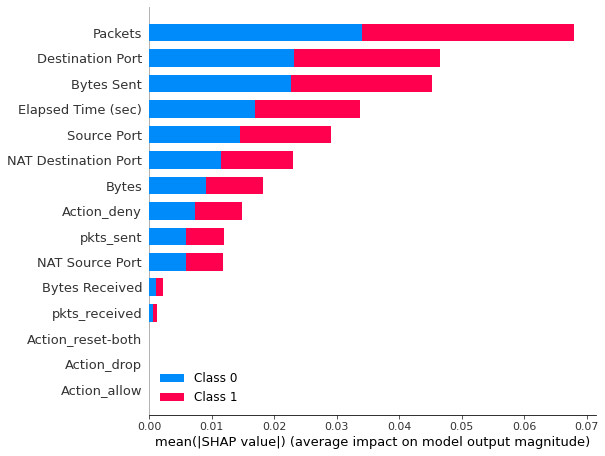

In [17]:
interpret_model(dt)

In [ ]:
interpret_model(dt, plot = 'reason', observation = 10)

In [ ]:

from pycaret.regression import *


reg1 = setup(data = iforest_results, target = 'Anomaly_Score', ignore_features=['Anomaly'])
lightgbm = create_model('lightgbm')



,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0025,0.0,0.0046,0.9949,0.0042,0.0693
1,0.0024,0.0,0.0039,0.9960,0.0036,0.0797
2,0.0024,0.0,0.0039,0.9964,0.0035,0.0911
3,0.0024,0.0,0.0042,0.9956,0.0037,0.0679
4,0.0024,0.0,0.0040,0.9959,0.0037,0.1318
5,0.0024,0.0,0.0046,0.9948,0.0041,0.0969
6,0.0025,0.0,0.0043,0.9953,0.0038,0.0807
7,0.0024,0.0,0.0039,0.9963,0.0036,0.0858
8,0.0025,0.0,0.0041,0.9959,0.0036,0.0781
9,0.0024,0.0,0.0037,0.9964,0.0034,0.1416


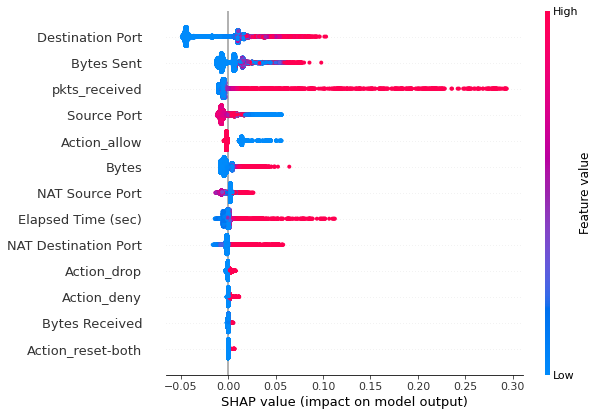

In [ ]:
interpret_model(lightgbm)

In [ ]:
evaluate_model(lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

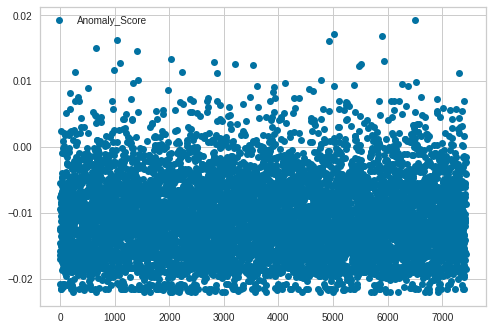

In [ ]:
df=iforest_results[['Fecha Hora' ,'Anomaly_Score']]
df.plot(style=['o','rx'])

In [ ]:
evaluate_model(dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
#best = compare_models(dt)

In [ ]:
plot_model(iforest)

IntProgress(value=0, description='Processing: ', max=5)

YellowbrickTypeError: ignored

In [ ]:
iforest_results.sort_values('Anomaly_Score', ascending=False)


,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Anomaly,Anomaly_Score
59454,15503,62336,46736,62336,allow,127653507,122661116,4992391,161030,2162,82907,78123,1,0.316670
16885,59275,443,56019,443,allow,242735602,5306961,237428641,238334,3604,81340,156994,1,0.314963
1935,57235,15187,23276,15187,allow,1269359015,948477220,320881795,1036116,9283,747520,288596,1,0.313259
37795,15792,3478,30536,3478,allow,428935914,213443641,215492273,635946,2242,308738,327208,1,0.311558
5581,51779,3389,21341,3389,allow,62242217,4119315,58122902,123738,4772,43917,79821,1,0.311558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35165,56336,53,36932,53,allow,198,93,105,2,30,1,1,0,-0.181478
51123,56396,53,37010,53,allow,183,94,89,2,30,1,1,0,-0.181478
21720,56587,53,37194,53,allow,184,94,90,2,30,1,1,0,-0.181478
52133,56515,53,36823,53,allow,177,94,83,2,30,1,1,0,-0.181478


In [ ]:
iforest_results.to_excel('Name.xlsx', index = False)
!ls
%dirs /"TS"

logs.log  Name.xlsx  sample_data


[]

In [ ]:
# load the car sales dataset
from pandas import read_excel
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from fbprophet import Prophet
from pandas import to_datetime

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Anomaly,Anomaly_Score
Source Port,1.000000,-0.331348,0.146209,-0.023501,0.000259,-0.000949,0.002070,-0.001732,-0.045126,-0.001425,-0.001937,-0.130331,-0.292580
Destination Port,-0.331348,1.000000,-0.282061,0.409202,-0.005168,0.001730,-0.014499,-0.005911,0.023304,-0.002037,-0.010706,0.146013,0.415564
NAT Source Port,0.146209,-0.282061,1.000000,0.178681,0.010694,0.002283,0.020877,0.012663,0.142303,0.007204,0.018816,0.121235,-0.210680
NAT Destination Port,-0.023501,0.409202,0.178681,1.000000,0.004193,0.008118,-0.003062,0.004837,0.219589,0.006344,0.001982,0.273481,0.345626
Bytes,0.000259,-0.005168,0.010694,0.004193,1.000000,0.933801,0.830419,0.974376,0.153155,0.966643,0.850220,0.073220,0.101734
Bytes Sent,-0.000949,0.001730,0.002283,0.008118,0.933801,1.000000,0.576105,0.888001,0.129806,0.974081,0.639867,0.025277,0.037580
Bytes Received,0.002070,-0.014499,0.020877,-0.003062,0.830419,0.576105,1.000000,0.843198,0.147753,0.691492,0.945949,0.127909,0.173893
Packets,-0.001732,-0.005911,0.012663,0.004837,0.974376,0.888001,0.843198,1.000000,0.151233,0.961399,0.917026,0.080940,0.111706
Elapsed Time (sec),-0.045126,0.023304,0.142303,0.219589,0.153155,0.129806,0.147753,0.151233,1.000000,0.138979,0.147985,0.375646,0.272987
pkts_sent,-0.001425,-0.002037,0.007204,0.006344,0.966643,0.974081,0.691492,0.961399,0.138979,1.000000,0.771888,0.050961,0.071256


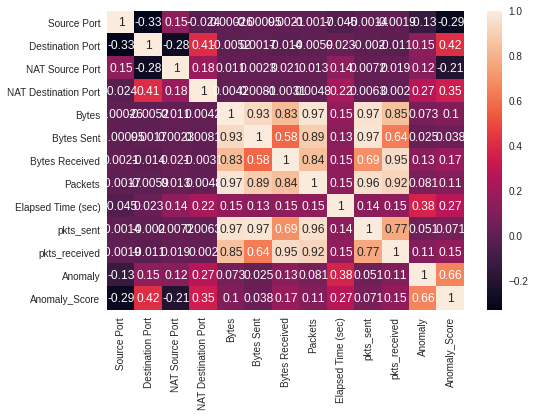

In [ ]:
corrMatrix = iforest_results.corr()
sns.heatmap(corrMatrix, annot=True)
corrMatrix

0.0
H1  La muestra no sigue una distribución normal
stat=-243.150, p=0.000
Probably Stationary


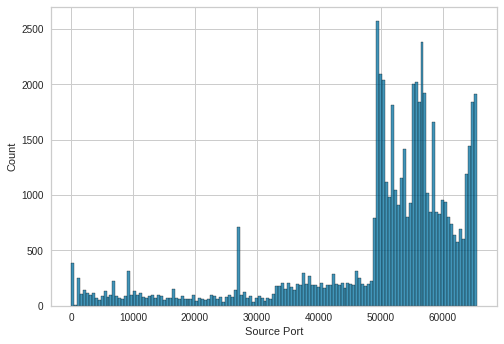

In [ ]:
#@title Texto de título predeterminado { run: "auto", vertical-output: true }
fila = "Source Port" #@param ["Source Port"]
anomalia = "0" #@param ["1", "0"]
a = iforest_results.loc[(iforest_results.Anomaly==int(anomalia))] 
sns.histplot(a[fila])
stat, p = stats.shapiro(a[fila])
# interpret
print(p)
alpha = 0.05
if p > alpha:
	print('0 La muestra sigue una distribución normal')
else:
	print('H1  La muestra no sigue una distribución normal')
# Example of the Augmented Dickey-Fuller unit root test
from statsmodels.tsa.stattools import adfuller
stat, p, lags, obs, crit, t = adfuller(a[fila])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably not Stationary')
else:
	print('Probably Stationary')


In [ ]:
unseen_predictions = predict_model(iforest, data=data_unseen)
unseen_predictions.head()



ValueError: ignored